In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision = 2) # print ÏòµÏÖò ÏÑ§Ï†ï ÏÜåÏàòÏ†ê ÏïÑÎûòÎ•º Í≥†Ï†ï Í∞íÏùÑ Ï†ïÌïòÏó¨ Ï∂úÎ†• 

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names]
y_fruits = fruits["fruit_label"]
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0) # ÎîîÌè¥Ìä∏Î°ú Train 75 % test 25% 


# Í∞Å FeatureÎßàÎã§ Í∞íÏùò Î≤îÏúÑÍ∞Ä Îã§Î•¥Îã§. Í∞Å FeatureÏùò Í∞íÏùÑ ÏùºÏ†ïÌïú Î≤îÏúÑ ÎòêÎäî Í∑úÏπôÏóê Îî∞Î•¥Í≤å ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïä§ÏºÄÏùºÎßÅÏùÑ ÏÇ¨Ïö©
# ÏµúÏÜåÍ∞í(Min)Í≥º ÏµúÎåÄÍ∞í(Max)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú '0~1' ÏÇ¨Ïù¥Ïùò Î≤îÏúÑ(range)Î°ú Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌôîÌï¥Ï£ºÎäî '0~1 Î≥ÄÌôò

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train) # ÌõàÎ†®Îç∞Ïù¥ÏôÄ ÌõàÎ†®ÎùºÎ≤®Ïóê fit ÏÇ¨Ïö© , knnÍ∞ùÏ≤¥Ïùò ÎÇ¥Î∂ÄÏÉÅÌÉúÎ•º ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî ÌõàÎ†®Í≥ºÏ†ï 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


Î™®Îç∏ÏùÄ Ïó∞Íµ¨ÎêòÍ±∞ÎÇò, ÏòàÏ∏°ÎêòÎäî ÌïòÎÇò Ïù¥ÏÉÅÏùò ÏûÖÎ†•Î≥ÄÏàòÏôÄ Ï∂úÎ≤ΩÎ≥ÄÏàò ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎ•º ÌëúÌòÑÌïòÎäî ÌäπÏ†ï ÏàòÌïôÏ†Å ÎòêÎäî Í≥ÑÏÇ∞Ï†Å ÏÑ§Î™Ö     
ÌÜµÍ≥Ñ ÏûÖÎ†•Î≥ÄÏàòÎ•º ÎèÖÎ¶ΩÎ≥ÄÏàò , Ï∂úÎ†•Î≥ÄÏàòÎ•º Ï¢ÖÏÜçÎ≥ÄÏàò y= f(x)    
Î®∏Ïã†Îü¨ÎãùÏóêÏÑúÎäî ÏûÖÎ†• ÎòêÎäî ÎèÖÎ¶ΩÎ≥ÄÏàòÎ•º ÏßÄÏπ≠ÌïòÍ∏∞ ÏúÑÌï¥ feture Ïö©Ïñ¥ ÏÇ¨Ïö© , Ï∂úÎ†•, Ï¢ÖÏÜçÎ≥ÄÏàòÎäî ÎåÄÏÉÅ Í∞í ÎòêÎäî ÎåÄÏÉÅÎ†àÏù¥Î∏îÎ°ú ÌëúÌòÑ 

#### Overfitting and Underfitting

Generalization ability refers to an algorithm's ability to give accurate predictions for new , previously unseen data.

* Asuumtions :
 - Future unseen data(test data) will have the same properties as the current traning sets.
 - Thus, models that are accurate on the traning set are expected to be accrate on the test set.
 - But that may not happen if the trained model is tuned too specifically to the training set.
 
 
* Models that are too complex for the amount of training data available are said to **overfit** and are not likely to generalization well to new example.
* Models that are too simple. that don't even do well the training data, are said to **underfit** and also not likely to generalize well.

#### Datasets

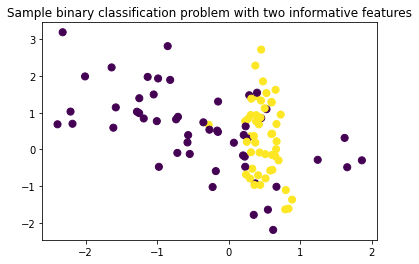

In [2]:
# Scikit-Learn Ìå®ÌÇ§ÏßÄÎäî Î∂ÑÎ•ò(classification) Î™®ÌòïÏùò ÌÖåÏä§Ìä∏Î•º ÏúÑÌï¥ Ïó¨Îü¨Í∞ÄÏßÄ Í∞ÄÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÎäî Ìï®ÏàòÎ•º Ï†úÍ≥µ
# make_blobs Ìï®ÏàòÎäî Îì±Î∞©ÏÑ± Í∞ÄÏö∞ÏãúÏïà Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Ïù¥Ïö©Ìï¥ Í∞ÄÏÉÅ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïúÎã§. Îì±Î∞©ÏÑ±Ïù¥ÎùºÎäî ÎßêÏùÄ Î™®Îì† Î∞©Ìñ•ÏúºÎ°ú Í∞ôÏùÄ ÏÑ±ÏßàÏùÑ Í∞ÄÏßÑÎã§Îäî Îúª
from sklearn.datasets import make_classification

#  synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
# ÌëúÎ≥∏Ïàò , ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò, ÎèÖÎ¶Ω Î≥ÄÏàò Ï§ë Îã§Î•∏ ÎèÖÎ¶Ω Î≥ÄÏàòÏùò ÏÑ†Ìòï Ï°∞Ìï©ÏúºÎ°ú ÎÇòÌÉÄÎÇòÎäî ÏÑ±Î∂ÑÏùò Ïàò, ÎèÖÎ¶Ω Î≥ÄÏàò Ï§ë Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî ÏÑ±Î∂ÑÏùò Ïàò
# ÌÅ¥ÎûòÏä§ Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïàò, ÏòàÏ∏°ÎùºÎ≤®ÏùÑ ÏûÑÏùòÎ°ú Î∞îÍøîÏÑú 100%Ïùò Ï†ïÌôïÎèÑÏóê Îã§Îã§Î•¥ÏßÄ Î™ªÌïòÍ≤å Î∞©ÏßÄ, ÌÅ¥ÎûòÏä§Í∞Ñ ÏñºÎßàÎÇò Îñ®Ïñ¥Ï†∏ÏûàÎäîÍ∞Ä
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

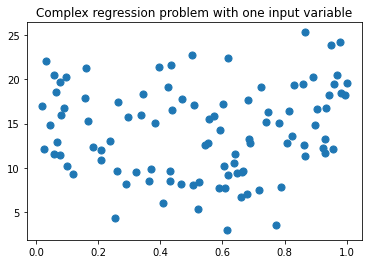

In [3]:
# synthetic dataset for more complex regression
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

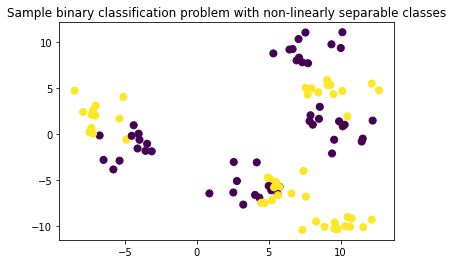

In [4]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
from sklearn.datasets import make_blobs
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

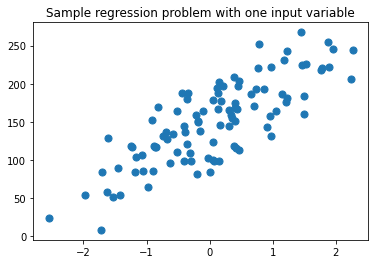

In [5]:
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')

# ÌëúÎ≥∏Ïùò Ïàò , ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò , ÎèÖÎ¶ΩÎ≥ÄÏàòÏ§ë Ïã§Ï†úÎ°ú Ï¢ÖÏÜçÎ≥ÄÏàòÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎäî ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ïàò, Ï†àÌé∏, Ï¢ÖÏÜçÎ≥ÄÏàòÏóê ÎçîÌï¥ÏßÄÎäî Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌëúÏ§ÄÌé∏Ï∞®
X_R1 , y_R1 = make_regression(n_samples =100 , n_features = 1 , n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

### K-Nearest Neighbors: Classification and Regression

Given a training set X_train with labels y_train, and given a new instance x_test to be classified:
1. Find the most similar instances (let's call them X_NN) to x_test that are in X_train.
2. Get the labels y_NN for the instances in X_NN
3. Predict the label for x_test by combining the labels y_NN e.g. simple majority vote

In [6]:
#  Regression
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))


[231.71 148.36 150.59 150.59  72.15 166.51 141.91 235.57 208.26 102.1
 191.32 134.5  228.32 148.36 159.17 113.47 144.04 199.23 143.19 166.51
 231.71 208.26 128.02 123.14 141.91]
R-squared test score: 0.425


The R2 ("r-squared") Regression Score
* Measures how well a prediction model for 

regression fits the given data.
* The score is between 0 and 1:
- A value of 0 corresponds to a constant model that predicts the mean value of all training target values.
- A value of 1 corresponds to perfect prediction
- Also known as "coefficient of determination"


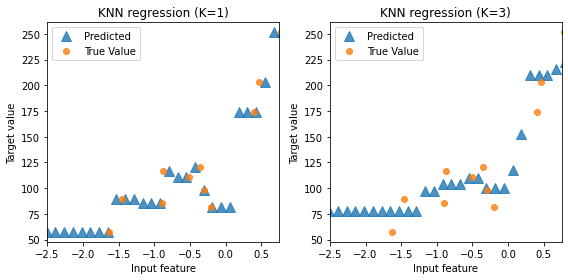

In [7]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

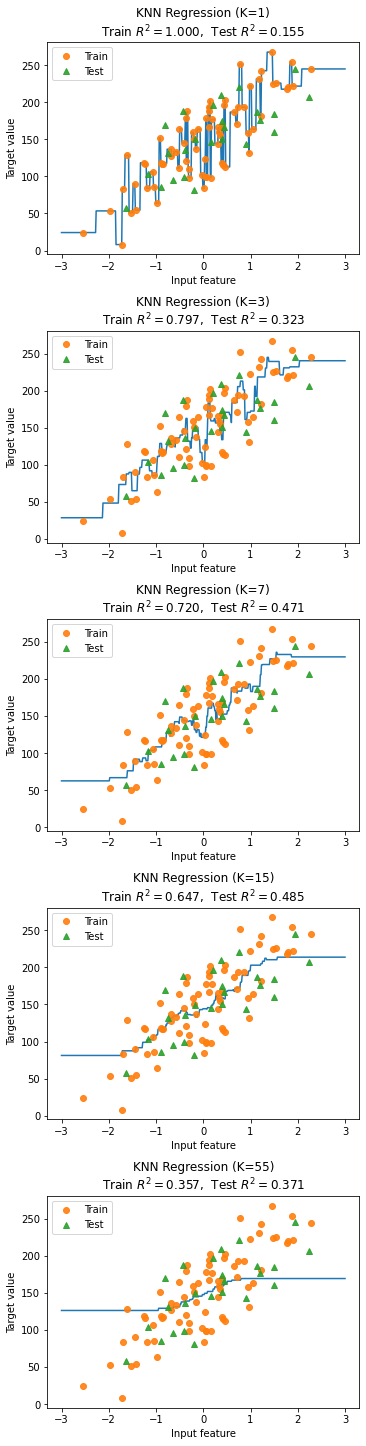

In [8]:
fig, subaxes = plt.subplots(5,1, figsize = (5,20))

X_predict_input = np.linspace(-3,3,500).reshape(-1,1)  # Í∑†Îì±Ìïú Í∞ÑÍ≤© 
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

KNeighborsClassifier and KNeighborsRegressor: important parameters  

Model complexity  
- n_neighbors : number of nearest neighbors (k) to consider,  Default = 5  

Model fitting  
- metric: distance function between data points
- Default: Minkowski distance with power parameter p = 2  (Euclidean)

### Linear Regression: Least-Squares

In [9]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


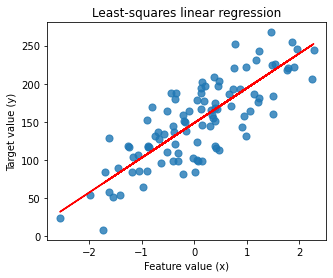

In [10]:
fig , ax = plt.subplots(figsize = (5,4))
ax.scatter(X_R1 , y_R1, marker  = "o" , s= 50 , alpha = 0.8)
ax.plot(X_R1 , linreg.coef_ * X_R1 + linreg.intercept_ , 'r-')   # Y = WoXo + B ,  W =  linreg.coef_ , b= linreg.intercept_
ax.set_title("Least-squares linear regression")
ax.set_xlabel("Feature value (x)")
ax.set_ylabel("Target value (y)")
plt.show()

### Ridge regression

Ridge regression learns w, b using the same least-squares criterion but adds a penalty for large variations in w parameters
* Once the parameters are learned, the ridge regression prediction formula is the same as ordinary least-squares.
* **The addition of a parameter penalty is called regularization. Regularization prevents overfitting by restricting the model, typically to reduce its complexity.** 
* Ridge regression uses L2 regularization: minimize sum of squares of w entries
* The influence of the regularization term is controlled by the ùõºùõº parameter.
*  Higher alpha means more regularization and simpler models

Îä•ÏÑ†ÌöåÍ∑ÄÎäî ÏµúÏÜåÏ†úÍ≥±Î≤ïÍ≥º Í∞ôÏùÄ Í∏∞Ï§ÄÏùÑ Ïì∞ÏßÄÎßå Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ , ÌõàÎ†® Îã®Í≥Ñ Ï§ëÏóê feature weight Ïóê Ìå®ÎÑêÌã∞Î•º ÎçîÌïòÎ©∞ wiÍ∞íÏùÄ Îß§Ïö∞ ÌÅº , weightÍ∞Ä ÌÅ¨Îã§Îäî ÏùòÎØ∏Îäî Ï†úÍ≥±Í∞íÏùò Ìï©Ïù¥ ÌÅ¨Îã§Îäî ÏùòÎØ∏ÌïúÎã§. Îä•ÏÑ†ÌöåÍ∑ÄÎ°ú ÏÑ†ÌòïÎ™®Îç∏ÏóêÏÑú w,b Îß§Í∞úÎ≥ÄÏàòÎ•º Ï∂îÏ†ïÌïòÍ≥† ÎÇòÎ©¥ , ÏÉà Ïù∏Ïä§ÌÑ¥Ïä§Ïóê ÎåÄÌïú yÍ∞í ÏòàÏ∏°ÎèÑ ÏµúÏÜåÏ†úÍ≥±Î≤ïÍ≥º Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú Í∞ÄÎä•ÌïòÎã§.

In [11]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 148.48609932907925
ridge regression linear model coeff:
[36.27]
R-squared score (training): 0.650
R-squared score (test): 0.545
Number of non-zero features: 1


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

# Í∞Å FeatureÎßàÎã§ Í∞íÏùò Î≤îÏúÑÍ∞Ä Îã§Î•¥Îã§. Í∞Å FeatureÏùò Í∞íÏùÑ ÏùºÏ†ïÌïú Î≤îÏúÑ ÎòêÎäî Í∑úÏπôÏóê Îî∞Î•¥Í≤å ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïä§ÏºÄÏùºÎßÅÏùÑ ÏÇ¨Ïö©
# ÏµúÏÜåÍ∞í(Min)Í≥º ÏµúÎåÄÍ∞í(Max)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú '0~1' ÏÇ¨Ïù¥Ïùò Î≤îÏúÑ(range)Î°ú Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌôîÌï¥Ï£ºÎäî '0~1 Î≥ÄÌôò
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 132.076872087215
ridge regression linear model coeff:
[31.24]
R-squared score (training): 0.179
R-squared score (test): 0.173
Number of non-zero features: 1


In [13]:
# ÏµúÏÜåÌäπÏßïÍ∞íÍ≥º ÏµúÎåÄ ÌäπÏßïÍ∞í Í≥ÑÏÇ∞ 
# Ï§ëÏöîÌïúÏ†êÏùÄ Ïñ¥ÎñªÍ≤å ÏµúÏÜåÏµúÎåÄ Ïä§ÏºÄÏùºÎßÅ , ÌõàÎ†® Î∞è ÌÖåÏä§Ìä∏ ÏÖãÏùò ÌïôÏäµÏãúÎÇòÎ¶¨Ïò§ÏóêÏÑúÏùò ÌäπÏßï ÌëúÏ§ÄÌôîÎ•º Ï†ÅÏö©ÏãúÌÇ§ÎäîÍ∞Ä
# ÌõàÎ†®Í≥º ÌÖåÏä§ÌåÖÏóê ÎèôÏùºÌïú Ïä§ÏºÄÏùºÎü¨ Í∞ùÏ≤¥Î•º Ï†ÅÏö© , ÌÖåÏä§Ìä∏ÏÖãÏù¥ ÏïÑÎãå ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïä§ÏºÄÏùºÎü¨ Í∞ùÏ≤¥Î•º ÌõàÎ†® ÌäπÏßïÌëúÏ§ÄÌôîÏóê ÌïµÏã¨ 
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s.fit(X_train)
x_train_s  = s.transform(X_train)
x_test_s = s.transform(X_test)
clf = Ridge().fit(x_train_s , y_train)
r2_score = clf.score(x_test_s , y_test)

# It can be more efficient to do fitting and transforming together on the training set using the fit_transform method

Feature Normalization: The test set must use identical scaling to the training set
- Fit the scaler using the training set, then apply the same scaler to transform the test set.
- Do not scale the training and test sets using different scalers: this could lead to random skew in the data.
- Do not fit the scaler using any part of the test data: referencing the test data can lead to a form of data leakage.

data leakageÎûÄ training Îç∞Ïù¥ÌÑ∞ Ïô∏Ïùò Ï†ïÎ≥¥Í∞Ä Î™®Îç∏ÏùÑ ÎßåÎìúÎäîÎç∞ ÏÇ¨Ïö©Îê†Îïå Î∞úÏÉù , Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†ïÎ≥¥Î•º ÌÜµÌï¥ Î™®Îç∏ÏùÄ Îã§Î•∏ Î∞©Î≤ïÏúºÎ°úÎäî ÏïåÏßÄ Î™ªÌïòÎäî Î¨¥Ïñ∏Í∞ÄÎ•º Î∞∞Ïö∞Í±∞ÎÇò ÏïåÏàò ÏûàÏúºÎ©∞, ÏÉùÏÑ±ÎêòÎäî Î™®Îç∏Ïùò ÏòàÏÉÅ ÏÑ±Îä•ÏùÑ Î¨¥Ìö®Ìôî Ìï† Ïàò ÏûàÎã§.

#### Ridge regression with regularization parameter: alpha

In [14]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 1, r-squared training: 0.68, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 1, r-squared training: 0.64, r-squared test: 0.55

Alpha = 10.00
num abs(coeff) > 1.0: 1, r-squared training: 0.30, r-squared test: 0.29

Alpha = 20.00
num abs(coeff) > 1.0: 1, r-squared training: 0.18, r-squared test: 0.17

Alpha = 50.00
num abs(coeff) > 1.0: 1, r-squared training: 0.08, r-squared test: 0.07

Alpha = 100.00
num abs(coeff) > 1.0: 1, r-squared training: 0.04, r-squared test: 0.03

Alpha = 1000.00
num abs(coeff) > 1.0: 0, r-squared training: 0.00, r-squared test: -0.01



Norm     
* Norm=Ï†àÎåÄÍ∞íÏù¥ ÏïÑÎãàÎã§. ÎßéÏùÄ Norm Ï§ë ÌïòÎÇòÍ∞Ä Ï†àÎåìÍ∞í |-1| = 1 , |(2,5)| 
* NormÏùÄ Ïñ¥Îñ§Í∞íÏùò ÌÅ¨Í∏∞Î•º Í≥ÑÏÇ∞ÌïòÏó¨ , ÎπÑÍµêÍ∞Ä Í∞ÄÎä•ÌïòÍ≤åÎÅî ÌïòÎäî Ìï®Ïàò 

L1 Norm(Mahattan Distance, Taxicab geometry) ÏùÄ ÎëêÍ∞úÏùò Î≤°ÌÑ∞Î•º ÎπºÍ≥† , Ï†àÎåÄÍ∞íÏùÑ Ï∑®Ìïú Îí§ Ìï©ÌïúÍ≤É
* x = (1,2,3) , y = (-4,-5,-6)  -> d(x,y) = |1-(-4)|+|2-(-5)|+|3-(-6)| = 5+7+9 

L2 Norm(Euclidean Distance) L2 NormÏùÄ Îëê Í∞úÏùò Î≤°ÌÑ∞Ïùò Í∞Å ÏõêÏÜåÎ•º ÎπºÍ≥†, Ï†úÍ≥±ÏùÑ ÌïòÍ≥†, Ìï©ÏπòÍ≥†, Î£®Ìä∏Î•º ÏîåÏö¥ Í≤É
* x=(1,2,3), y=(-4,-5,-6)ÏùÄ d(x,y)=root(5+7+9)

<img src="https://blog.kakaocdn.net/dn/FIyhg/btqCRyyEJ86/UbaS1cpDzIk0wvuc1DeeK1/img.png" width = "400px" heigh="300px"><img>

L1 Loss NormÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÑ L1 Loss ÏàòÏãù ÎòêÌïú ÌÅ¨Í≤å Îã§Î•º Î∞î ÏóÜÎã§. Îëê Í∞úÏùò Î≤°ÌÑ∞Í∞Ä Îì§Ïñ¥Í∞ÄÎçò ÏûêÎ¶¨Ïóê Ïã§Ï†ú ÌÉÄÍ≤üÍ∞í(y_true)ÏôÄ ÏòàÏ∏° ÌÉÄÍ≤üÍ∞í(y_pred)Ïù¥ Îì§Ïñ¥Í∞îÏùÑ ÎøêÏù¥Îã§.L1 LossÎäî L2 LossÏóê ÎπÑÌï¥ Ïù¥ÏÉÅÏπò(Outlier)Ïùò ÏòÅÌñ•ÏùÑ Îçú Î∞õÎäî, Ïù¥ÏÉÅÏπò/ÏóêÎü¨Í∞íÏúºÎ°ú Î∂ÄÌÑ∞ ÏòÅÌñ•ÏùÑ ÌÅ¨Í≤å Î∞õÏßÄ ÏïäÎäî ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑÎã§.   


L2 LossÎèÑ Îã§Î•¥ÏßÄ ÏïäÏßÄÎßå ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Î£®Ìä∏Î•º Ï∑®ÌïòÏßÄ ÏïäÎäîÎã§Îäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.Îëê Í∞ú Í∞íÏùò Ï†àÎåÄÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎçò L1 LossÏôÄÎäî Îã¨Î¶¨ L2 LossÎäî Ï†úÍ≥±ÏùÑ Ï∑®ÌïòÍ∏∞Ïóê, Ïù¥ÏÉÅÏπòÍ∞Ä Îì§Ïñ¥Ïò§Î©¥ Ïò§Ï∞®Í∞Ä Ï†úÍ≥±Ïù¥ ÎèºÏÑú Ïù¥ÏÉÅÏπòÏóê ÏòÅÌñ•ÏùÑ Îçî Î∞õÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Í≤ΩÏö∞ Ï†ÅÏö©ÌïòÍ∏∞ ÌûòÎì† Î∞©Î≤ïÎ°†




L1 Regularization
Í∏∞Ï°¥ LossÏóê Ï†àÎåìÍ∞íÎßåÌÅºÏùò Ìå®ÎÑêÌã∞Î•º Ï§åÏúºÎ°úÏç® CostÍ∞Ä Îçî Ïª§ÏßÄÍ≤å ÎßåÎì† ÏÖàÏù∏Îç∞, Î™®Îç∏ WeightÏùò Í≥ºÎèÑÌïú Î≥ÄÌôîÎ•º ÎßâÎäîÎã§. Ï†ÄÍ∏∞ÏÑú ÎûåÎã§Í∞Ä ÏûëÏïÑÏßà ÏàòÎ°ù, ÏïΩÌïú Ï†ïÍ∑úÌôîÍ∞Ä Ï†ÅÏö©ÎêúÎã§. Sparse featureÏóê ÏùòÏ°¥Ìïú Î™®Îç∏Ïóê L1 RegularizationÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥, Î∂àÌïÑÏöîÌïú FeatureÏóê ÎåÄÏùëÌïòÎäî WeightÎ•º Ï†ïÌôïÌûà 0ÏúºÎ°ú ÎßåÎì§Ïñ¥Î≤ÑÎ†§, Feature selectionÏùò Ìö®Í≥ºÎ•º ÎÇ∏Îã§.

L1 RegularizationÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Lasso modelÏù¥ÎùºÍ≥†ÎèÑ ÌïúÎã§.

 

L2 Regularization
 L2 RegÎäî Î∂àÌïÑÏöîÌïú Feature(Ïù¥ÏÉÅÏπò)Ïóê ÎåÄÏùëÌïòÎäî WeightÎ•º 0Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§ Îøê, 0ÏúºÎ°ú ÎßåÎì§ÏßÄÎäî ÏïäÎäîÎã§. Ïù¥Îü∞ ÌäπÏÑ± ÎïåÎ¨∏Ïóê, Í∞ïÌïòÍ≤å Î∞ÄÏñ¥Î∂ôÏù¥Îäî L1 RegÎ∞òÌï¥ L2 RegÏùÄ ÏÑ†Ìòï Î™®Îç∏Ïùò ÏùºÎ∞òÌôî Îä•Î†•ÏùÑ Ìï≠ÏÉÅ Í∞úÏÑ†ÏãúÌÇ§Îäî Í≤ÉÏúºÎ°ú ÏïåÎ†§Ï†∏ ÏûàÎã§. ÎßàÏßÄÎßâÏúºÎ°ú L2 RegÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ridge modelÏù¥ÎùºÍ≥† ÌïúÎã§.

<img src="https://blog.kakaocdn.net/dn/b3LOX0/btqCQ4xRyJi/Ym9mmK5g7G1lXRbrxEbnO1/img.png" width = "400px" heigh="300px"><img>

### Lasso regression

In [15]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_R1), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 55.83884866864045
lasso regression linear model coeff:
[175.02]
Non-zero features: 1
R-squared score (training): 0.650
R-squared score (test): 0.545

Features with non-zero weight (sorted by absolute magnitude):
	[-0.36], 175.016


### Lasso regression with regularization parameter: alpha

In [16]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 1, r-squared training: 0.68, r-squared test: 0.51

Alpha = 1.00
Features kept: 1, r-squared training: 0.67, r-squared test: 0.53

Alpha = 2.00
Features kept: 1, r-squared training: 0.65, r-squared test: 0.55

Alpha = 3.00
Features kept: 1, r-squared training: 0.61, r-squared test: 0.54

Alpha = 5.00
Features kept: 1, r-squared training: 0.50, r-squared test: 0.47

Alpha = 10.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02

Alpha = 20.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02

Alpha = 50.00
Features kept: 0, r-squared training: 0.00, r-squared test: -0.02



### Polynomial Features with Linear Regression

Generate new features consisting of all polynomial(Îã§Ìï≠) combinations of the original two features ùë•ùë•0, ùë•ùë•1 .
- the degree of the polynomial specifies how many variables participate at a time in each new feature 
- This is still a weighted linear combination of features, so it's still a linear model, and can use same least-squares estimation method for w and b.

Why would we want to transform our data this way?
- To capture interactions between the original features by adding them as features to the linear model.
- To make a classification problem easier 
* More generally, we can apply other non-linear transformations to create new features
- (Technically, these are called non-linear basis functions)
* Beware of polynomial feature expansion with high as this can lead to complex models that overfit
- Thus, polynomial feature expansion is often combined with a regularized learning method like ridge regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

# Ï∞®ÏàòÍ∞Ä 2Î°ú ÏÑ§Ï†ïÎêú Îã§Ìï≠Ïãù ÌäπÏßï Í∞ùÏ≤¥Î•º ÎßåÎì† Îã§Ïùå ÏõêÎ≥∏ XF1 ÌäπÏßïÏùò Îã§Ìï≠Ïãù ÌäπÏßï Í∞ùÏ≤¥Ïùò Ï†ÅÌï©Î≥ÄÌôòÎ∞©Î≤ïÏùÑ Ìò∏Ï∂úÌïòÏó¨
# ÏÉàÎ°úÏö¥ Îã§Ìï≠Ïãù Î≥ÄÌôò ÌäπÏßï XF1_polyÎ•º ÏÉùÏÑ±

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 4.42  6.    0.53 10.24  6.55 -2.02 -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ 3.41e-12  1.66e+01  2.67e+01 -2.21e+01  1.24e+01  6.93e+00  1.05e+00
  3.71e+00 -1.34e+01 -5.73e+00  1.62e+00  3.66e+00  5.05e+00 -1.46e+00
  1.95e+00 -1.51e+01  4.87e+00 -2.97e+00 -7.78e+00  5.15e+00 -4.65e+00
  1.84e+01 -2.22e+00  2.17e+00 -1.28e+00  1.88e+00  1.53e-01  5.62e-01
 -8.92e-01 -2.18e+00  1.38e+00 -4.90e+00 -2.24e+00  1.38e+00 -5.52e-01
 -1.09e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a regularization penalty, like ridge
regression.

(p

## Linear models for classification

### Logistic regression
ÌôïÎ•† Î™®Îç∏Î°úÏÑú ÎèÖÎ¶Ω Î≥ÄÏàòÏùò ÏÑ†Ìòï Í≤∞Ìï©ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏÇ¨Í±¥Ïùò Î∞úÏÉù Í∞ÄÎä•ÏÑ±ÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêòÎäî ÌÜµÍ≥Ñ Í∏∞Î≤ïÏù¥Îã§.

Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÏùò Î™©Ï†ÅÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ ÌöåÍ∑Ä Î∂ÑÏÑùÏùò Î™©ÌëúÏôÄ ÎèôÏùºÌïòÍ≤å Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàòÍ∞ÑÏùò Í¥ÄÍ≥ÑÎ•º Íµ¨Ï≤¥Ï†ÅÏù∏ Ìï®ÏàòÎ°ú ÎÇòÌÉÄÎÇ¥Ïñ¥ Ìñ•ÌõÑ ÏòàÏ∏° Î™®Îç∏Ïóê ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥Îã§. Ïù¥Îäî ÎèÖÎ¶Ω Î≥ÄÏàòÏùò ÏÑ†Ìòï Í≤∞Ìï©ÏúºÎ°ú Ï¢ÖÏÜç Î≥ÄÏàòÎ•º ÏÑ§Î™ÖÌïúÎã§Îäî Í¥ÄÏ†êÏóêÏÑúÎäî ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑùÍ≥º Ïú†ÏÇ¨ÌïòÎã§. ÌïòÏßÄÎßå Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî ÏÑ†Ìòï ÌöåÍ∑Ä Î∂ÑÏÑùÍ≥ºÎäî Îã§Î•¥Í≤å Ï¢ÖÏÜç Î≥ÄÏàòÍ∞Ä Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º ÎåÄÏÉÅÏúºÎ°ú ÌïòÎ©∞ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÏñ¥Ï°åÏùÑ Îïå Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Í≥ºÍ∞Ä ÌäπÏ†ï Î∂ÑÎ•òÎ°ú ÎÇòÎâòÍ∏∞ ÎïåÎ¨∏Ïóê ÏùºÏ¢ÖÏùò Î∂ÑÎ•ò (classification) Í∏∞Î≤ïÏúºÎ°úÎèÑ Î≥º Ïàò ÏûàÎã§.

Î°úÏßÄÏä§Ìã± Ìï®Ïàò Ï†ÅÏö©Ïùò Ìö®Í≥ºÎäî ÏÑ†ÌòïÌï®ÏàòÏùò Ï∂úÎ†•ÏùÑ ÏïïÏ∂ïÌïòÏó¨ 0Í≥º 1ÏÇ¨Ïù¥Ïùò Î≤îÏúÑÎ°ú Ï†úÌïúÌïòÎäî Í≤É

The logistic function transforms real-valued input to an output number ybetween 0 and 1, interpreted 
as the probability the input object belongs to the positive class, given its input features 

In [18]:
from sklearn.linear_model import LogisticRegression

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                y_fruits_apple.values,
                random_state = 0))
clf = LogisticRegression(C=100).fit(X_train, y_train)


h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


#### Logistic regression regularization: C parameter

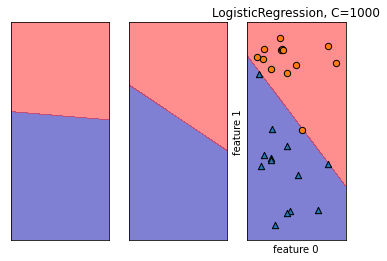

In [19]:
from mglearn.plots import plot_2d_separator
from mglearn.datasets import make_forge

x, y = make_forge()
c_set = [0.001, 1, 1000]
_, axes = plt.subplots(1, 3)

for c_arg, axe in zip(c_set, axes.ravel()):
    params = {'C':c_arg}
    clf = LogisticRegression(**params).fit(x, y)

    plot_2d_separator(clf, x, fill=True, ax=axe, eps=0.5, alpha=0.5)
    
    idx_set = []
        
    for i in np.unique(y): # np.unique: Ïú†ÏùºÌïú Í∞íÎßå Î¶¨ÌÑ¥
        idx = np.where(y==i)[0]
        idx_set.append(idx)

axe.scatter(x[idx_set[0]][:, 0], x[idx_set[0]][:, 1], s=40, edgecolors='k', # edgecolors='k' : 'k'=black
                    label='class 0', marker='^')
axe.scatter(x[idx_set[1]][:, 0], x[idx_set[1]][:, 1], s=40, edgecolors='k',
                label='class 1', marker='o')
axe.set_title('{}, C={}'.format(clf.__class__.__name__, c_arg))
axe.set_xlabel('feature 0')
axe.set_ylabel('feature 1')


plt.show()

Logistic Regression: Regularization
- L2 regularization is 'on' by default (like ridge regression)
- Parameter C controls amount of regularization (default 1.0)
- As with regularized linear regression, it can be important to normalize all features so that they are on the same scale.


### Support Vector Machines

 Ïù¥ÏßÑÎ∂ÑÎ•òÎ≤ïÏùÄ ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú Î≥¥ÏïòÎçò ÏÑ†Ìòï Ìï®Ïàò ÌòïÏãùÏùÑ ÏÇ¨Ïö© Ïó∞ÏÜçÎ™©ÌëúÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäî ÎåÄÏã† ÏÑ†ÌòïÌï®ÏàòÏùò Ï∂úÎ†•ÏùÑ Í∞ÄÏ†∏ÏôÄ ÏÇ¨Ïù∏Ìï®ÏàòÎ•º Ï†ÅÏö©ÌïòÏó¨ ÎëêÍ∞úÏùò ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏îÎ°ú ÎëêÍ∞ÄÏßÄ Í∞íÏùÑ Í∞ÄÏßÄÎäî Ïù¥ÏßÑ Ï∂úÎ†•ÏùÑ ÏÉùÏÑ±ÌïúÎã§. ÎßåÏïΩ Î™©ÌëúÍ∞íÏù¥ 0Î≥¥Îã§ ÌÅ¨Î©¥ Ìï®ÏàòÎäî +1ÏùÑ Î∞òÌôò , Î™©ÌëúÍ∞íÏù¥ 0Î≥¥Îã§ ÏûëÎã§Î©¥ -1Î•º Î∞òÌôò

#### Classifier Margin  
Îëê ÌÅ¥ÎûòÏä§ ÏÇ¨Ïù¥Ïóê Ï†úÍ≥µÌï† Ïàò ÏûàÎäî Î∂ÑÎ¶¨ Ï†ïÎèÑÎ•º Î≥¥ÏÉÅÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùÄ Î∂ÑÎ•òÏûêÎ•º Ï†ïÏùòÌïòÎäî Í≤É  
Defined as the maximumwidth the decision boundaryarea can be increased before hitting a data point.  
Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Î•º ÏπòÍ∏∞Ï†ÑÏóê Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º Ï¶ùÍ∞ÄÏãúÌÇ¨ Ïàò ÏûàÎäî ÎÑàÎπÑ, Ïó¨Î∞±ÏùÄ Í≤∞Ï†ïÍ≤ΩÍ≥ÑÏóêÏÑú Í∞ÄÏû• Í∞ÄÍπåÏö¥ Îç∞Ïù¥ÌÑ∞ Ï†êÏóê ÏàòÏßÅÏúºÎ°ú Í∞à Ïàò ÏûàÎäî ÎÑàÎπÑÏùò Í±∞Î¶¨

Maximum margin classifier The linear classifier withmaximum margin is a linear Support Vector Machine(LSVM)  

ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(Ïù¥Ìïò SVM)ÏùÄ Í≤∞Ï†ï Í≤ΩÍ≥Ñ(Decision Boundary), Ï¶â Î∂ÑÎ•òÎ•º ÏúÑÌïú Í∏∞Ï§Ä ÏÑ†ÏùÑ Ï†ïÏùòÌïòÎäî Î™®Îç∏Ïù¥Îã§. Í∑∏ÎûòÏÑú Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ ÏÉàÎ°úÏö¥ Ï†êÏù¥ ÎÇòÌÉÄÎÇòÎ©¥ Í≤ΩÍ≥ÑÏùò Ïñ¥Îäê Ï™ΩÏóê ÏÜçÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥ÏÑú Î∂ÑÎ•ò Í≥ºÏ†úÎ•º ÏàòÌñâÌï† Ïàò ÏûàÍ≤å ÎêúÎã§.

ÏµúÏ†ÅÏùò Í≤∞Ï†ï Í≤ΩÍ≥Ñ(Decision Boundary)  
Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎäî Îç∞Ïù¥ÌÑ∞Íµ∞ÏúºÎ°úÎ∂ÄÌÑ∞ ÏµúÎåÄÌïú Î©ÄÎ¶¨ Îñ®Ïñ¥ÏßÄÎäîÍ≤å Ï¢ãÎã§. Ïã§Ï†úÎ°ú ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†(Support Vector Machine)Ïù¥ÎùºÎäî Ïù¥Î¶ÑÏóêÏÑú Support VectorsÎäî Í≤∞Ï†ï Í≤ΩÍ≥ÑÏôÄ Í∞ÄÍπåÏù¥ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Îì§ÏùÑ ÏùòÎØ∏ÌïúÎã§. Ïù¥ Îç∞Ïù¥ÌÑ∞Îì§Ïù¥ Í≤ΩÍ≥ÑÎ•º Ï†ïÏùòÌïòÎäî Í≤∞Ï†ïÏ†ÅÏù∏ Ïó≠Ìï†ÏùÑ ÌïòÎäî ÏÖàÏù¥Îã§.

ÎßàÏßÑ(Margin)
ÎßàÏßÑ(Margin)ÏùÄ Í≤∞Ï†ï Í≤ΩÍ≥ÑÏôÄ ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÏùòÎØ∏

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" width = "200px" heigh="300px"><img>

Í∞ÄÏö¥Îç∞ Ïã§ÏÑ† 'Í≤∞Ï†ï Í≤ΩÍ≥Ñ'. Ïã§ÏÑ†ÏúºÎ°úÎ∂ÄÌÑ∞ Í≤ÄÏùÄ ÌÖåÎëêÎ¶¨Í∞Ä ÏûàÎäî Í≤ÄÏùÄÏÉâ Ï†ê1 , ÌïòÏñÄÏÉâÏ†ê 2Í∞úÍπåÏßÄ ÏòÅÏó≠ÏùÑ ÎëêÍ≥† Ï†êÏÑ†ÏùÑ Í∑∏Ïñ¥ÎÜìÏïòÎã§. Ï†êÏÑ†ÏúºÎ°úÎ∂ÄÌÑ∞ Í≤∞Ï†ï Í≤ΩÍ≥ÑÍπåÏßÄÏùò Í±∞Î¶¨Í∞Ä Î∞îÎ°ú ‚ÄòÎßàÏßÑ(margin)‚ÄôÏù¥Îã§.

ÏµúÏ†ÅÏùò Í≤∞Ï†ï Í≤ΩÍ≥ÑÎäî ÎßàÏßÑÏùÑ ÏµúÎåÄÌôîÌïúÎã§.

Í∑∏Î¶¨Í≥† ÏúÑ Í∑∏Î¶ºÏóêÏÑúÎäî xÏ∂ïÍ≥º yÏ∂ï 2Í∞úÏùò ÏÜçÏÑ±ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞Î°ú Í≤∞Ï†ï Í≤ΩÍ≥ÑÎ•º Í∑∏ÏóàÎäîÎç∞, Ï¥ù 3Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏(ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞)Í∞Ä ÌïÑÏöîÌñàÎã§. Ï¶â, nÍ∞úÏùò ÏÜçÏÑ±ÏùÑ Í∞ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÏóêÎäî ÏµúÏÜå n+1Í∞úÏùò ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§Îäî Í±∏ Ïïå Ïàò ÏûàÎã§.

The strength of regularization is determined by C
- Larger values of C: less regularization
- Fit the training data as well as possible
- Each individual data point is important to classify correctly
- Smaller values of C: more regularization
- More tolerant of errors on individual data points


Linear Models: Pros and ConsPros:
- Simple and easy to train , Fast prediction. Scales well to very large  datasets.
- Works well with sparse data.,Reasons for prediction are  relatively easy to interpret.
Cons:
- For lower-dimensional data, other models may have superior generalization performance.
- For classification, data may notbe linearly separable (more on this in SVMs with non-linear kernels)


linear_model: Important Parameters   
Model complexity
- alpha: weight given to the L1 or L2 regularization term in regression models ,default = 1.0
- C: regularization weight for LinearSVC and LogisticRegression classification models ,default = 1.0


In [20]:
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")

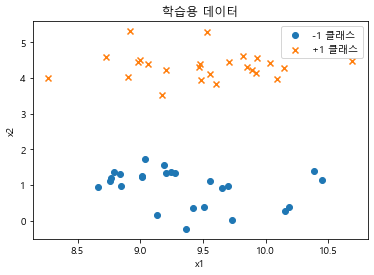

In [21]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 ÌÅ¥ÎûòÏä§")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 ÌÅ¥ÎûòÏä§")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞")
plt.show()

In [22]:
SVC(kernel='linear', C=1e10)
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)


xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 ÌÅ¥ÎûòÏä§")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 ÌÅ¥ÎûòÏä§")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM ÏòàÏ∏° Í≤∞Í≥º")

plt.show()

NameError: name 'SVC' is not defined

### Multi-Class Classification

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']


plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d , edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

### Kernelized Support Vector Machines
ÏÑ†ÌòïÏúºÎ°ú Î∂ÑÎ•òÎêòÏßÄ ÏïäÏùÄ Î™®Îç∏Ïóê Ï†ÅÏö© 

#### Radial Basis Function Kernel
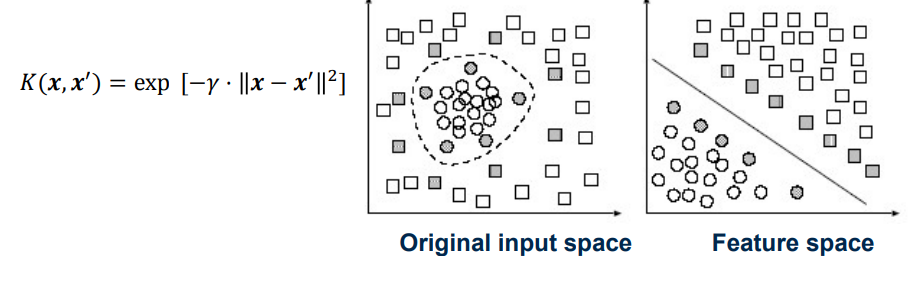
Î∞©ÏÇ¨ÌòïÍ∏∞Ï†ÄÌï®ÏàòÏª§ÎÑêÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏõêÌÅ¥ÎûòÏä§Ïùò ÏùºÏ†ïÍ±∞Î¶¨ÏïàÏóê ÏûàÎäî Î™®Îì† Ï†êÏùÑ Î≥ÄÌôòÎêú ÌäπÏßï Í≥µÍ∞ÑÏùò Ìïú ÏòÅÏó≠ÏúºÎ°ú Î≥ÄÌôò, ÌäπÏ†ï Î∞òÍ≤Ω Î∞ñÏóê ÏûàÎäî ÏÇ¨Í∞ÅÌòï ÌÅ¥ÎûòÏä§Ïùò Î™®Îì† Ï†êÏùÄ ÌäπÏßï Í≥µÍ∞ÑÏùò Îã§Î•∏ ÏòÅÏó≠ÏúºÎ°ú Ïù¥ÎèôÌïúÎã§. Í≤ÄÏùÄÏÉâ ÏõêÍ≥º ÏÇ¨Í∞ÅÌòïÏùÄ Î≥ÄÌôòÎêú ÌäπÏßï Í≥µÍ∞ÑÏóêÏÑú ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†Ïùò ÏµúÎåÄ ÎßàÏßÑÏùÑ Îî∞Îùº ÏúÑÏπò Ìï† Ïàò ÏûàÎäî Ï†êÎì§ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. Ïª§ÎÑêÌôîÎêú ÏÑúÌè¨Ìä∏Î∞±ÌÑ∞Î®∏Ïã†ÏùÄ ÏõêÎûò ÏûÖÎ†•Í≥µÍ∞ÑÏù¥ ÏïÑÎãå Î≥ÄÌôòÎêú ÌäπÏßï Í≥µÍ∞ÑÏóêÏÑú ÏÑ†Ìòï Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÅ¥ÎûòÏä§ Í∞ÑÏùò ÏµúÎåÄ ÎßàÏßÑÏúºÎ°ú Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º Ï∞æÏúºÎ†§Í≥† ÌïúÎã§. Ïª§ÎÑêÌôîÎêú SVMÏùÄ Î≥ÄÌôòÎêú ÌäπÏßï ÌëúÌòÑÏù¥ ÎÇ¥Ïû¨Îêú Í≥†Ï∞®Ïõê Í≥µÍ∞ÑÏóêÏÑú Ï†êÎì§Ïùò Ïåç ÏÇ¨Ïù¥Ïùò Ïú†ÏÇ¨ÏÑ±ÏùÑ Í≥ÑÏÇ∞Ìï¥ Ïù¥Îü¨Ìïú Í¥ÄÏ†êÏóêÏÑú Îçî Î≥µÏû°Ìïú Í≤∞Ï†ïÍ≤ΩÍ≥ÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎã§.

Radial Basis Function kernel: Gamma Parameter  
Îã® ÌïòÎÇòÏùò Ï∂îÏÑ∏ ÏòàÏ†úÏùò ÏòÅÌñ•Ïù¥ Ïñ¥Îäê Ï†ïÎèÑÍπåÏßÄ ÎèÑÎã¨ÌïòÎäîÏßÄÎ•º Ï†úÏñ¥ÌïòÎ©∞, Í≤∞Ï†ïÍ≤ΩÍ≥ÑÍ∞Ä ÏûÖÎ†• Í≥µÍ∞ÑÏùò Ï£ºÎ≥ÄÏßÄÏ†êÍπåÏßÄ ÏñºÎßàÎÇò Í∏¥Î∞ÄÌïòÍ≤å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÏòÅÌñ•ÏùÑ Ï§ÄÎã§. Í∞êÎßàÍ∞íÏù¥ ÏûëÎã§Îäî Í≤ÉÏùÄ Ïú†ÏÇ¨ÏÑ± Î∞òÍ≤ΩÏù¥ ÌÅ¨Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏, Îî∞ÎùºÏÑú Îçî Î©ÄÎ¶¨ Îñ®Ïñ¥ÏßÑ Ìè¨Ïù∏Ìä∏ÍπåÏßÄ Ïú†ÏÇ¨ÌïòÎã§Í≥† Ïù∏ÏãùÎêúÎã§. Í∞êÎßàÍ∞íÏù¥ Ïª§Ïßà ÏàòÎ°ù Ïª§ÎÑêÍ∞íKÏóê Îçî Îπ®Î¶¨ ÎèÑÎã¨ÌïòÎ©∞ ÏïÑÏ£º Í∞ÄÍπåÏù¥ ÏûàÎäî Ìè¨Ïù∏Ìä∏Îì§Îßå Ïú†ÏÇ¨ÌïòÎã§Í∞ÄÍ≥† Ïù∏ÏãùÎêúÎã§.

### Cross-validation
ÏßÄÎèÑÌïôÏäµ Method Ï†àÏ∞®  
Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ train/testÎ°ú Î∂ÑÎ¶¨, Ìä∏Î†àÏù¥Îãù ÏÑ∏Ìä∏Ïóê fit methodÎ•º Ìò∏Ï∂úÌï¥ÏÑú Î™®Îç∏Í∞íÏùÑ Ï∂îÏ∏°, predict method Ïç®ÏÑú ÏÉà Îç∞Ïù¥ÌÑ∞ Ïù∏Ïä§ÌÑ¥Ïä§Ïóê Î™®Îç∏ÏùÑ Ï†ÅÏö©ÌïòÍ±∞ÎÇò score methodÎ•º Ïç®ÏÑú Ìä∏Î†àÏù¥ÎãùÌïú Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌÖåÏä§Ìä∏ÏÖãÏóêÏÑú ÌèâÍ∞Ä

**ÍµêÏ∞®Í≤ÄÏ¶ùÏùÄ Îã®ÏàúÌûà Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ train/test ÎÇòÎàÑÎäîÍ±∏ ÎÑòÏñ¥ÏÑú Ïó¨Îü¨Î≤àÏùò Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌïú ÌõÑ Í∞úÎ≥ÑÍ≥ºÏ†ïÎßàÎã§ Î™®Îç∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† ÌèâÍ∞ÄÌïúÎã§.**
ÍµêÏ∞®Í≤ÄÏ¶ùÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Îçî ÏïàÏ†ïÏ†ÅÏù∏ Ï∂îÏ†ïÏπòÎ•º Ï†úÍ≥µ, ÌïúÎ≤àÏùò train setÏóê Ï†ÑÏ†ÅÏúºÎ°ú ÏùòÏ°¥ÌïòÎäîÍ≤å ÏïÑÎãàÎùº Ïó¨Îü¨Í∞úÏùò train/test splitÏùÑ Ìïú ÌõÑ Í≤∞Í≥ºÎ•º ÌèâÍ∑†ÎÇ¥Í∏∞ ÎïåÎ¨∏Ïù¥Îã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú Í∞úÎ≥Ñ fold (Í∞úÎ≥ÑÎç∞Ïù¥ÌÑ∞ÏÖã)ÎßàÎã§ ÎÇòÏò§Îäî Ï†ïÌôïÎèÑÎ•º Ìï©ÏÇ∞Ìïò ÌõÑ ÌèâÍ∑†ÏùÑ ÎÇ¥Ïñ¥ÏÑú Íµ¨Ìï¥ÏßÑ ÌèâÍ∑†ÍµêÏ∞® Í≤ÄÏ¶ù Ï†êÏàòÎ•º Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÏùò Ï∏°ÎèÑÎ°ú ÏÇ¨Ïö©ÌïúÎã§.  

Stratified Cross-validation  
Ï∏µÌôî k-Í≤π ÍµêÏ∞®Í≤ÄÏ¶ùÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†Ìï†Îïå Í∞úÎ≥Ñ Ìè¥Îìú ÎßàÎã§Ïùò ÌÅ¥ÎûòÏä§Í∞Ñ Î∂ÑÌè¨Í∞Ä, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Ïóê ÏµúÎåÄÌïú ÏÉÅÏùëÌïòÍ≤å Î∂ÑÌï†Ìï¥Ï§ÄÎã§.

In [24]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.values
y = y_fruits_2d.values
cv_scores = cross_val_score(clf, X, y)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.75 0.75 0.83 0.83 0.82]
Mean cross-validation score (3-fold): 0.797


In [25]:
# Î™®Îç∏ Îß§Í∞úÎ≥í„Ñ¥ÏàòÍ∞Ä ÍµêÏ∞®Í≤ÄÏ¶ù Ïä§ÏΩîÏñ¥Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ• ÌååÏïÖ 

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [26]:
print(train_scores)

[[0.46 0.44 0.42]
 [0.85 0.72 0.75]
 [0.92 0.9  0.93]
 [1.   1.   0.97]]


In [27]:
print(test_scores)

[[0.5  0.3  0.32]
 [0.85 0.7  0.63]
 [0.55 0.85 0.68]
 [0.4  0.2  0.37]]


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

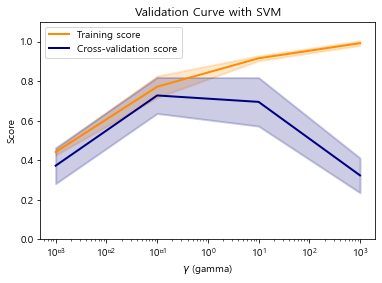

In [28]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()



#The validation curve shows the mean cross-validation accuracy (solid lines) for training (orange) and test 
#(blue) sets as a function of the SVM parameter (gamma). It also shows the variation around the mean (shaded 
# region) as computed from kfold cross-validation scores

### Decision Trees
Ïñ¥Îñ§ Ìï≠Î™©Ïóê ÎåÄÌïú Í¥ÄÏ∏°Í∞íÍ≥º Î™©ÌëúÍ∞íÏùÑ Ïó∞Í≤∞ÏãúÏºúÏ£ºÎäî ÏòàÏ∏° Î™®Îç∏Î°úÏÑú Í≤∞Ï†ï Ìä∏Î¶¨Î•º ÏÇ¨Ïö©ÌïúÎã§.Ìä∏Î¶¨ Î™®Îç∏ Ï§ë Î™©Ìëú Î≥ÄÏàòÍ∞Ä Ïú†ÌïúÌïú ÏàòÏùò Í∞íÏùÑ Í∞ÄÏßÄÎäî Í≤ÉÏùÑ Î∂ÑÎ•ò Ìä∏Î¶¨Îùº ÌïúÎã§. Ïù¥ Ìä∏Î¶¨ Íµ¨Ï°∞ÏóêÏÑú Ïûé(Î¶¨ÌîÑ ÎÖ∏Îìú)ÏùÄ ÌÅ¥ÎûòÏä§ ÎùºÎ≤®ÏùÑ ÎÇòÌÉÄÎÇ¥Í≥† Í∞ÄÏßÄÎäî ÌÅ¥ÎûòÏä§ ÎùºÎ≤®Í≥º Í¥ÄÎ†®ÏûàÎäî ÌäπÏßïÎì§Ïùò ÎÖºÎ¶¨Í≥±ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. Í≤∞Ï†ï Ìä∏Î¶¨ Ï§ë Î™©Ìëú Î≥ÄÏàòÍ∞Ä Ïó∞ÏÜçÌïòÎäî Í∞í, ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïã§ÏàòÎ•º Í∞ÄÏßÄÎäî Í≤ÉÏùÄ ÌöåÍ∑Ä Ìä∏Î¶¨Îùº ÌïúÎã§.

ÏùòÏÇ¨Í≤∞Ï†ïÌä∏Î¶¨Î•º ÏûëÏÑ±Ìï† ÎïåÏùò Î™©ÌëúÎäî Í∞ÄÏû• Ï†ÅÏùÄ Îã®Í≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•òÌï†Îïå Ï†ïÌôïÎèÑÍ∞Ä Í∞ÄÏû•Ï¢ãÏùÄ ÏùºÎ†®Ïùò ÏßàÎ¨∏ÏùÑ Ï∞æÎäî Í≤É  
Í≤∞Ï†ïÌä∏Î¶¨Îäî Í∞ÄÏû• Ï†ïÎ≥¥ÏÑ± ÏûàÍ≤å ÎÇòÎà†Ïßà Ïàò ÏûàÎäî ÌäπÏßïÏùÑ Ï∞æÎäî Í≤ÉÏúºÎ°ú ÏïåÍ≥†Î¶¨Ï¶ò ÏãúÏûë, ÌäπÏ†ï Í∏∞Îä•Í∞íÏóê ÎåÄÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÏûÑÏùòÏùò Î∂ÑÌï†Ïóê ÎåÄÌï¥ , ÏµúÏÉÅÏùò Î∂ÑÌï†Ïùò Í≤ΩÏö∞ÏóêÎèÑ ÏùºÎ∂Ä ÏòàÏ†úÎäî Ïó¨Ï†ÑÌûà ÏûòÎ™ª Î∂ÑÎ•òÎêòÍ±∞ÎÇò Ï∂îÍ∞ÄÎ∂ÑÌï†Ïù¥ ÌïÑÏöîÌï† Ïàò ÏûàÎã§. ÏùòÏÇ¨Í≤∞Ï†ï Ìä∏Î¶¨ÏóêÏÑú Î™®Îì†Í≤ÉÏù¥ Í∞ôÍ±∞ÎÇò Ï†ÅÏñ¥ÎèÑ Î™©ÌëúÍ∞íÏùò ÎåÄÎ∂ÄÎ∂ÑÏùÑ Ï∞®ÏßÄÌï† ÎïåÍπåÏßÄ Ïù¥ Í≥ºÏ†ïÏùÑ Ïû¨Í∑ÄÏ†ÅÏúºÎ°ú Í≥ÑÏÜç ÏßÑÌñâÌï† Ïàò ÏûàÎã§. leaf node Í∞Ä Î™®Îëê ÎèôÏùºÌïú Î™©ÌëúÍ∞íÏùÑ Í∞ñÎäî Ìä∏Î¶¨Îäî leaf node  Ïñ¥ÎäêÏ†ïÎèÑÏùò ÌòºÌï©ÏùÑ Ìè¨Ìï®ÌïòÎèÑÎ°ù ÌóàÏö©Îêú Ìä∏Î¶¨ÏôÄ Íµ¨Î∂ÑÌïòÏó¨ ÏàúÏàòÌïú Ìä∏Î¶¨ÎùºÍ≥† ÏßÄÏπ≠ÌïúÎã§. 

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#ÏÑ∏Í∞úÏùò ÌÅ¥ÎûòÏä§Î•º ÏòàÏ∏°Ìï†Îïå ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑÎ•º Í≥ÑÏÇ∞, ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Îäî 1.0Ïùò Ï†ïÌôïÏÑ±ÏúºÎ°ú ÏôÑÎ≤ΩÌïòÍ≤å ÏòàÏ∏°Îêú Î∞òÎ©¥Ïóê
# ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥Ïßê, Ïù¥Îäî Ìä∏Î¶¨Í∞Ä Í≥ºÏ†ÅÌï©ÎêòÏóàÎã§Îäî ÌëúÏãúÏù¥Î©∞, Î¶¨ÌîÑÎÖ∏ÎìúÍ∞Ä ÏàúÏàòÌï† ÎïåÍπåÏßÄ Í∑úÏπôÏùÑ Í≥ÑÏÜç 
# Ï∂îÍ∞ÄÌïòÎäî ÏùºÎ∞òÏùòÏÇ¨Í≤∞Ï†ïÌä∏Î¶¨Î•º Íµ¨Ï∂ïÌïòÎäî Í≥ºÏ†ïÏóêÏÑú Î∞úÏÉùÌïòÎäî Î¨∏Ï†úÎã§.

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


#### Setting max decision tree depth to help avoid overfitting

In [30]:
# Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïú Î∞©Î≤ï 
# ÏÇ¨Ï†Ñ Í∞ÄÏßÄÏπòÍ∏∞ ( Ìä∏Î¶¨ÏÉùÏÑ±ÏùÑ ÏùºÏ∞ç Ï§ëÎã® )
# ÏÇ¨ÌõÑÍ∞ÄÏßÄÏπòÍ∏∞ ÎòêÎäî Í∞ÄÏßÄÏπòÍ∏∞ (Ìä∏Î¶¨Î•º ÎßåÎì† ÌõÑ Îã§Ïãú Í∞ÑÎã®Ìïú ÌòïÌÉúÎ°ú ÎêòÎèåÎ¶¨Îäî Î∞©Î≤ï)
# Í≤∞Ï†ïÌä∏Î¶¨ Íµ¨ÌòÑÍ≥º ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏóêÏÑúÎäî ÏÇ¨Ï†Ñ Í∞ÄÏßÄÏπòÍ∏∞ Íµ¨ÌòÑÎßå Í∞ÄÎä• 

clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


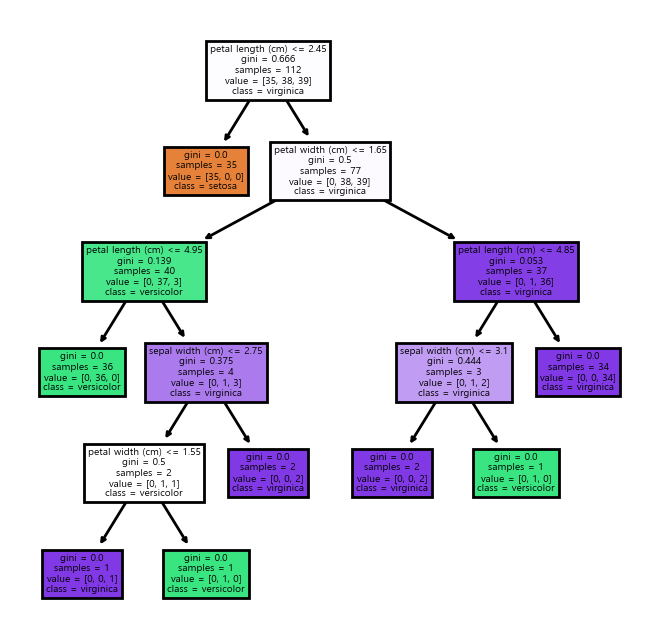

In [37]:
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(clf,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

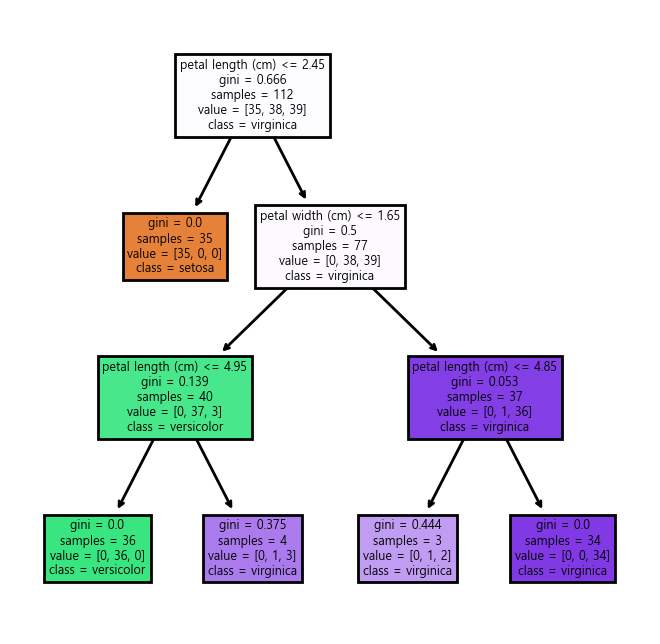

In [38]:
#ÏÇ¨Ï†Ñ Í∞ÄÏßÄÏπòÍ∏∞ 
from sklearn import tree
from sklearn.tree import export_graphviz

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(clf2,
               feature_names = iris.feature_names, 
               class_names=iris.target_names,
               filled = True);

#### Feature importance`

Feature Importance: How important is a feature to overall prediction accuracy?
- A number between 0 and 1 assigned to each feature.
- Feature importance of 0 the feature was not used in prediction.
- Feature importance of 1 the feature predicts the target perfectly.
- All feature importances are normalized to sum to 1.


Feature importances:
[0.   0.03 0.55 0.43]
sepal length (cm) : 0.000
sepal width (cm) : 0.025
petal length (cm) : 0.546
petal width (cm) : 0.429


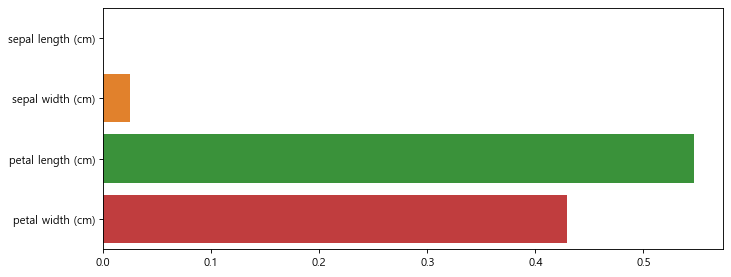

In [52]:
import matplotlib as pyplot
import seaborn as sns 

print("Feature importances:\n{0}".format(np.round(clf.feature_importances_, 3)))

for n,v in zip (iris.feature_names, clf.feature_importances_) :
     print('{0} : {1:.3f}'.format(n, v))


fig,ax = plt.subplots(figsize=(10,4), dpi=80)

sns.barplot(x=clf.feature_importances_ , y=iris.feature_names, ax = ax)
plt.show()

Decision Trees: Pros and ConsPros:
- Easily visualized and interpreted.
- No feature normalization or scaling typically needed.
- Work well with datasets using a mixture of feature types (continuous, categorical, binary)
Cons:
- Even after tuning, decision trees can often still overfit.
- Usually need an ensemble of trees for better generalization performance

